#Level 1

##About the data set


This is a very simple dataset giving stats about the passengers in the Titanic. It has 11 columns:


*   PassengerID
*   Survived(0/1)
*   Pclass(passenger class)
*   Name
*   Sex
*   Age
*   SibSp(siblings and spouse of the passenger on board)
*   Parch(parents and children of the passenger on board)
*   Ticket
*   Fare
*   Embarked(the port which they boarded titanic)

##Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

##Exploring the dataset

In [3]:
#basica
print(df.head())
print('Shape: ',df.shape)
print('Info: \n')
df.info()
df.describe(include='all')

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Sh

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
#choosing only required rows and columns to display.
new_df = df.iloc[:,[0,1,4,5]]
new_df.head()

,PassengerId,Survived,Sex,Age
0,1,0,male,22.0
1,2,1,female,38.0
2,3,1,female,26.0
3,4,1,female,35.0
4,5,0,male,35.0


### Exercises

In [5]:
#find the number of passengers.
count = df['Name'].nunique()
print('Number of passengers: ',count)


Number of passengers:  891


In [6]:
#find the column names.
columns = df.columns.tolist()
print('Columns: ',columns)

Columns:  ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
#find the columns having null values.
res = []
for column in columns:
  if df[column].isnull().values.any():
    print(column, ' : ', df[column].isnull().sum())
    res.append(column)
print('Columns having null values: ', res)

Age  :  177
Cabin  :  687
Embarked  :  2
Columns having null values:  ['Age', 'Cabin', 'Embarked']


##Data Cleaning

In [8]:
#df['Age'].fillna(df['Age'].median(),inplace=True)
#df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
#the above can cause chain assignment which is unsafe. it confuses pandas whrther its a copy or original

df.fillna({'Age':df['Age'].median(), 'Embarked':df['Embarked'].mode()[0]},inplace=True)

In [9]:
#drop irrelevant columns.
df.drop(columns={'Cabin','Fare','Ticket'},inplace=True) #fare is removed but we have passenger class.

In [10]:
#rename columns to standar form
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [11]:
#finding datatypes and converting if necessary (category helps to store efficiently)
print(df.dtypes)
df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
print(df.dtypes)

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
embarked        object
dtype: object
passengerid       int64
survived       category
pclass         category
name             object
sex              object
age             float64
sibsp             int64
parch             int64
embarked         object
dtype: object


##Data Manipulation

###Selection, Filtering

In [12]:
survived_passengers = df[df['survived']==1]
print(survived_passengers.iloc[:,[0,1,2,4,5,6,7,8]].head())

   passengerid survived pclass     sex   age  sibsp  parch embarked
1            2        1      1  female  38.0      1      0        C
2            3        1      3  female  26.0      0      0        S
3            4        1      1  female  35.0      1      0        S
8            9        1      3  female  27.0      0      2        S
9           10        1      2  female  14.0      1      0        C


In [13]:
selected_columns = survived_passengers[['age','pclass','sex']]
print(selected_columns.head())

    age pclass     sex
1  38.0      1  female
2  26.0      3  female
3  35.0      1  female
8  27.0      3  female
9  14.0      2  female


In [14]:
#sorting can be done on original dataset to study based on age, class(not including it here)

###Grouping

In [15]:
#survial based on class.
df['survived'] = df['survived'].astype('int64')
df.groupby('pclass',observed=True)['survived'].mean()


,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [16]:
#survival based on gender.
df['survived'] = df['survived'].astype('int64')
df.groupby('sex',observed=True)['survived'].mean()

,survived
sex,
female,0.742038
male,0.188908


In [17]:
#survival based on gender+class
df['survived'] = df['survived'].astype('int64')
df.groupby(['sex','pclass'],observed=True)['survived'].mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [18]:
#finding family size and analyzing
df['family_size']=df['sibsp']+df['parch']
df.groupby('family_size',observed=True)['survived'].mean()

#we can observe smaller families had high survival (maybe due to easy mobility)

,survived
family_size,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [19]:
#analysis - this can help us identify who were effected the most (based on which country they belong to)
embark_count = df['embarked'].value_counts()
print(embark_count)

embarked
S    646
C    168
Q     77
Name: count, dtype: int64


##Data Visualisation

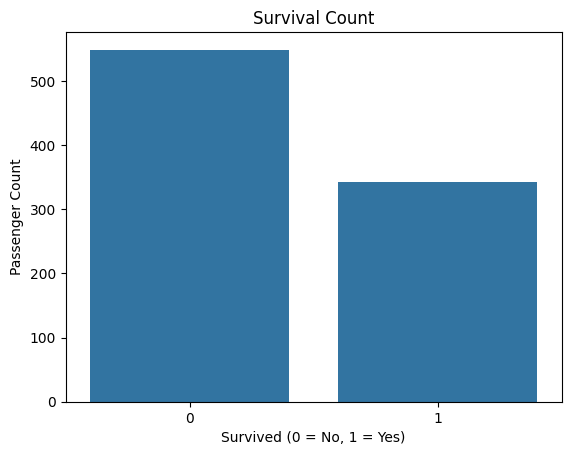

In [20]:
#survival rate
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

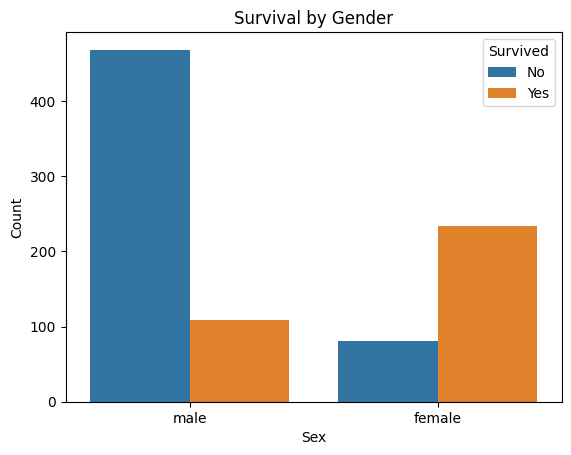

In [21]:
#survival by gender
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

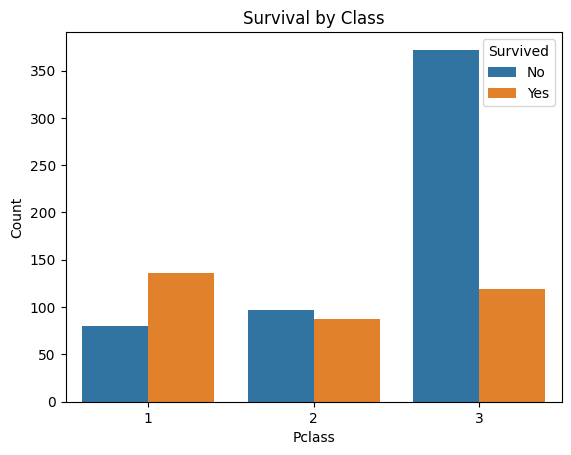

In [22]:
#survival by class
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Survival by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

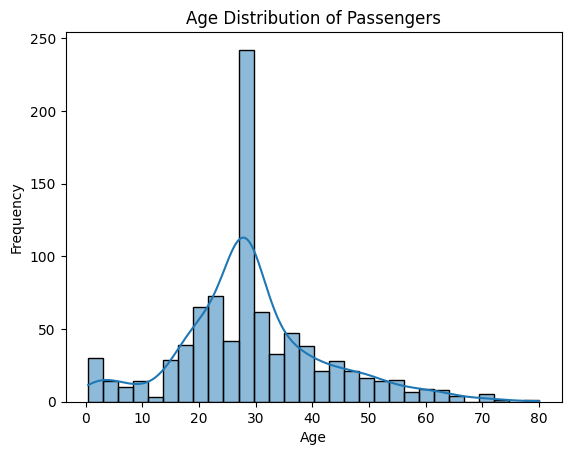

In [23]:
#ages of passengers
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#we can say max were around 30

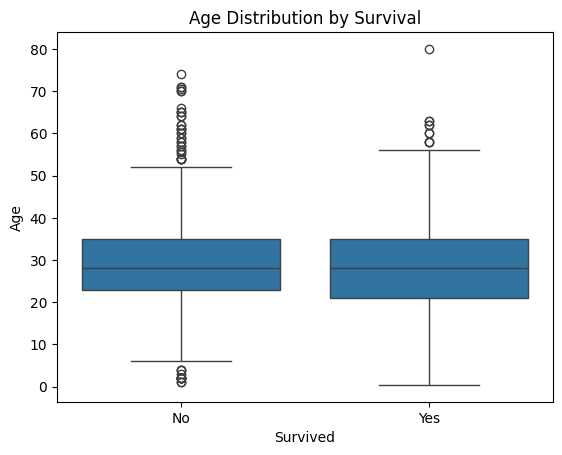

In [24]:
#age vs survival medians
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

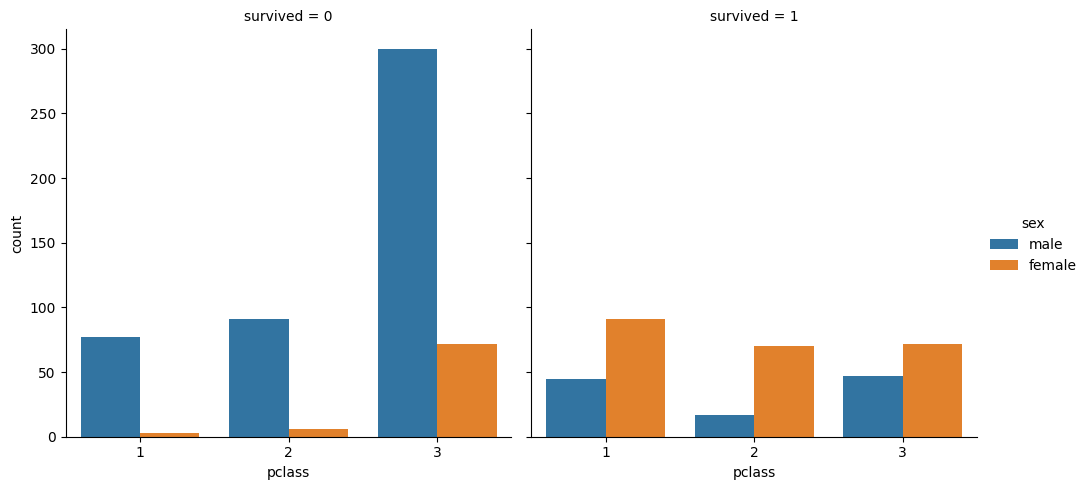

In [25]:
#grouped plots
sns.catplot(data=df, x="pclass", hue="sex", col="survived", kind="count")



#Level 2

##Feature Engineering

###Dropping unwanted columns

In [26]:
print(df.columns.tolist())
#id, embarked won't affect the survival, therefore can be dropped
df.drop(columns={'passengerid','embarked'},inplace=True)
print(df.columns.tolist())

['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'embarked', 'family_size']
['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'family_size']


###Feature Creation



We create new features that help us in prediction, we already made 'family_size' previously, let us add one more feature 'is_alone' which also plays a role in survival.

'title', can be a help to the 'age' column in grouping people by age.

In [27]:
df['is_alone'] = (df['family_size']==0).astype(int);
print(df.columns.tolist());

['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'is_alone']


In [28]:
df['title'] = df['name'].str.extract(' ([A-Za-z]+)\.', expand=False);
df.drop(columns={'name'},inplace=True)
print(df.columns.tolist())

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'is_alone', 'title']


###Encoding


Encoding is used to convert data into numerics - which can be understood by the ml model.

Label encoding is the simplest but it might make the model a little biased, but it is the simplest to use. (trees can use them efficiently)

One hot encoding eleminates that issue but inturn requires extra columns as it represents the category as binary number. (linear models need this)

Sex can be determined using two bits isMale and isFemale. So we will be using One hot encoding which seperates the sex column into two. We will use drop_first to store it in a single column.

In [29]:
df['sex_male'] = pd.get_dummies(df['sex'], drop_first=True).astype(int)
df.drop('sex', axis=1, inplace=True)
print(df.columns.tolist())
print('\n',df.iloc[:,[0,1,3,4,5,6,7]].head())

['survived', 'pclass', 'age', 'sibsp', 'parch', 'family_size', 'is_alone', 'title', 'sex_male']

    survived pclass  sibsp  parch  family_size  is_alone title
0         0      3      1      0            1         0    Mr
1         1      1      1      0            1         0   Mrs
2         1      3      0      0            0         1  Miss
3         1      1      1      0            1         0   Mrs
4         0      3      0      0            0         1    Mr


In [30]:
#pclass is categorical but class actually effects survival, so there can be a bias.
df['pclass'] = df['pclass'].astype(int)

In [31]:
#encodind the titel column.
df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


We can't afford these many new columns, so we group the columns with < 10 value as 'other'

In [32]:
rare_titles=['Dr','Rev','Col','Mlle','Major','Ms','Mme','Don','Lady','Sir','Capt','Countess','Jonkheer']
df['title'] = df['title'].replace(rare_titles,'other')
df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
other,27


In [33]:
df = pd.get_dummies(df,columns=['title'],drop_first=True)
df = df.astype({col: int for col in df.select_dtypes(include='bool').columns})
df.head()

,survived,pclass,age,sibsp,parch,family_size,is_alone,sex_male,title_Miss,title_Mr,title_Mrs,title_other
0,0,3,22.0,1,0,1,0,1,0,1,0,0
1,1,1,38.0,1,0,1,0,0,0,0,1,0
2,1,3,26.0,0,0,0,1,0,1,0,0,0
3,1,1,35.0,1,0,1,0,0,0,0,1,0
4,0,3,35.0,0,0,0,1,1,0,1,0,0


###Outlier Detection


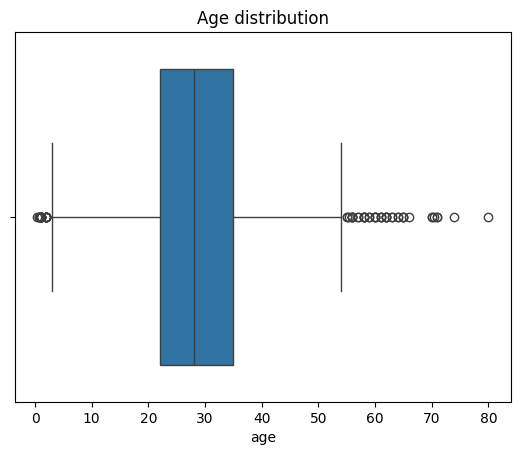

In [34]:
# check for presence of outliers.
sns.boxplot(x=df['age'])
plt.title('Age distribution')
plt.show()

The circles/dots represent the outliers.

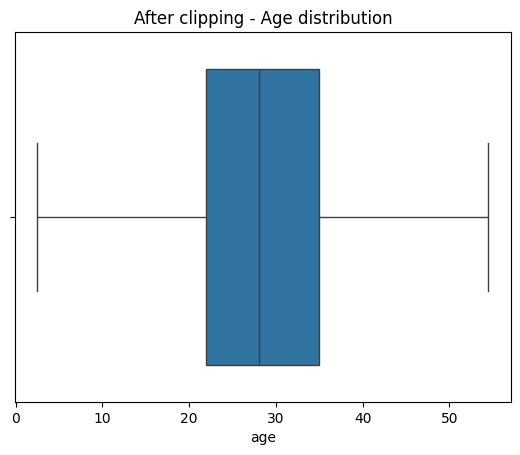

In [35]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
low_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df['age'] = df['age'].clip(lower=low_bound,upper=upper_bound)

sns.boxplot(x=df['age'])
plt.title('After clipping - Age distribution')
plt.show()

##Feature Scaling

Scaling is required for models that are not based on trees, as they are range sensitive

In [36]:
from sklearn.preprocessing import StandardScaler
cols = ['age','sibsp','parch','family_size']
import joblib

scaler = StandardScaler()

df[cols] = scaler.fit_transform(df[cols])

joblib.dump(scaler,'scaler.pkl')


['scaler.pkl']

##Model Training

###Splitting the dataset

In [37]:
from sklearn.model_selection import train_test_split
x = df.drop('survived',axis=1)
y = df['survived']

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=45)


###Train and Evaluate

let's work with 2 models, tree based and a non-tree based(linear)

####Linear Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

lr_y_pred = lr_model.predict(x_test)

joblib.dump(lr_model,'lr_model.pkl')

print('Linear regression model : ')
print('accuracy: ',accuracy_score(y_test,lr_y_pred))
print('classicification report: \n', classification_report(y_test,lr_y_pred))
print('confusion matrix: \n', confusion_matrix(y_test,lr_y_pred))

Linear regression model : 
accuracy:  0.8547486033519553
classicification report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       117
           1       0.78      0.81      0.79        62

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.86      0.85      0.86       179

confusion matrix: 
 [[103  14]
 [ 12  50]]


####Random Forest Classifier (tree-based)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

rf_y_pred = rf_model.predict(x_test)

joblib.dump(rf_model,'rf_model.pkl')

print('Random forest classifier model : ')
print('accuracy: ',accuracy_score(y_test,rf_y_pred))
print('classicification report: \n', classification_report(y_test,rf_y_pred))
print('confusion matrix: \n', confusion_matrix(y_test,rf_y_pred))

Random forest classifier model : 
accuracy:  0.8547486033519553
classicification report: 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       117
           1       0.76      0.85      0.80        62

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.85      0.86       179

confusion matrix: 
 [[100  17]
 [  9  53]]


####Terms to remember

* precision indicates - the correctness of the predictions made

* recall indiactes - the number of correct predictions.

* f1-score indicates - the harmonic mean (relation between precision and recall)

* support indicates - the number of instances of that class.

* weighted avg - gives the average of both classes and also considers the number of instances.

* confusion matrix rows are True positive True negative and columns are False positive and false negative


## Conclusion: Model Comparison




In this project, I trained and evaluated two models on the Titanic dataset: **Logistic Regression** and **Random Forest Classifier**. Both achieved an **overall accuracy of 85%**, indicating solid performance on the given features. However, their behavior differed slightly:

- **Logistic Regression**:
  - Performed slightly better in **precision for survivors (class 1)**.
  - Being a linear model, it offers **interpretability** and is more sensitive to properly scaled features.
  - Suitable when we need a **baseline** or when working with clean, preprocessed data.

- **Random Forest Classifier**:
  - Showed stronger **recall for survivors**, meaning it identified more of the actual survivors correctly.
  - As a tree-based model, it handled **non-linear patterns** and **did not require feature scaling**.
  - It was slightly better at capturing **complex interactions** in the data.

> **Takeaway**:  
> While both models performed similarly in terms of accuracy, **Random Forest** showed better generalization for survival prediction. It would be the preferred model if we prioritize **catching more true survivors**.  
> For future work, deeper tuning, cross-validation, and testing on larger datasets can help improve and refine the models further.